### **General description**
The project presents an analysis of the most important data such as GDP, debt, population etc., collected from over 200 countries. The aim of the project is to visualize the individual data and understand the possible dependencies between the countries.

### **1. Data preprocessing (converting, removing null values, etc.)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data for 2003 (apparently)
df = pd.read_csv('countries.csv', sep=';')
df = df.drop(index=0) # Remove data types row

In [3]:
# Convert data types
df['Country'] = df['Country'].astype('string')
num_cols = df.columns
num_cols = [x for x in num_cols if x != 'Country']
df[num_cols] = df[num_cols].astype(float)
df.dtypes

Country                                           string[python]
Area(sq km)                                              float64
Birth rate(births/1000 population)                       float64
Current account balance                                  float64
Death rate(deaths/1000 population)                       float64
Debt - external                                          float64
Electricity - consumption(kWh)                           float64
Electricity - production(kWh)                            float64
Exports                                                  float64
GDP                                                      float64
GDP - per capita                                         float64
GDP - real growth rate(%)                                float64
HIV/AIDS - adult prevalence rate(%)                      float64
HIV/AIDS - deaths                                        float64
HIV/AIDS - people living with HIV/AIDS                   float64
Highways(km)             

### **2. Data visualization**

##### **Comparison of GDP and public debt (% of GDP) of the 15 largest countries by GDP**

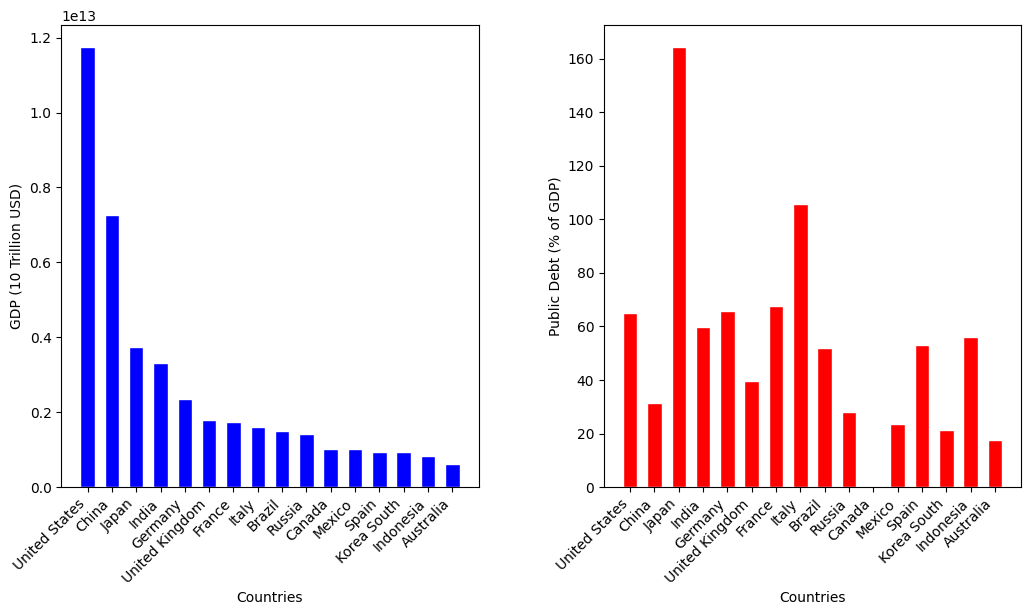

In [4]:
df_nn = df.dropna(axis=0, subset=['GDP'])
df_nn = df_nn.sort_values(by='GDP', ascending=False)

# Remove EU from set
eu = df_nn['Country'] == '#European Union'
df_nn = df_nn.drop(df_nn.index[eu])

countries = df_nn['Country'].head(16).to_list()
gdp = df_nn['GDP'].head(16).to_list()
public_debt = df_nn[f'Public debt(% of GDP)'].head(16).to_list()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(countries, gdp, color='blue', width=0.6, edgecolor='white')
ax1.set_xticks(range(len(countries)))
ax1.set_xticklabels(countries, rotation=45, ha='right')
ax1.set_xlabel('Countries')
ax1.set_ylabel('GDP (10 Trillion USD)')

ax2.bar(countries, public_debt, color='red', width=0.6, edgecolor='white')
ax2.set_xticks(range(len(countries)))
ax2.set_xticklabels(countries, rotation=45, ha='right')
ax2.set_xlabel('Countries')
ax2.set_ylabel(f'Public Debt (% of GDP)')

plt.subplots_adjust(left=0.1, right=0.9, wspace=0.3)
plt.show()

The countries are sorted in descending order (GDP), on the charts we can see that the most indebted countries in percentage terms are Japan and Italy, while nominally the USA, which also has the highest GDP indicator deviating from other countries.

##### **Comparison of energy consumption and population in the USA, EU and China**

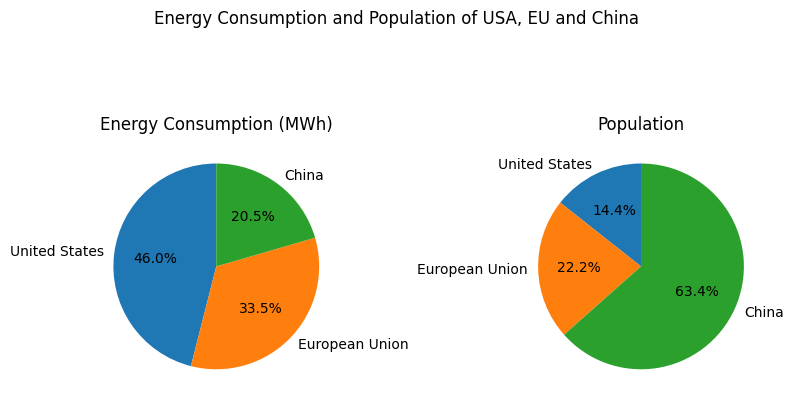

In [5]:
df_energy = df.sort_values(by='GDP', ascending=False)
countries = df_energy['Country'].head(3).to_list()
energy_consumption = df_energy['Electricity - consumption(kWh)'].head(3).to_list()
population = df_energy['Population'].head(3).to_list()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

ax1.pie(energy_consumption, labels=['United States', 'European Union', 'China'], autopct="%1.1f%%", startangle=90)
ax1.set_title("Energy Consumption (MWh)")

ax2.pie(population, labels=['United States', 'European Union', 'China'], autopct="%1.1f%%", startangle=90)
ax2.set_title("Population")

plt.suptitle("Energy Consumption and Population of USA, EU and China")
plt.tight_layout()

plt.show()

On the pie charts we see that despite the largest population China consumes the smallest amounts of energy in relation to the USA and the EU, in the case of the United States the situation is reversed - the smallest population with the highest energy consumption.

##### **Correlation on the matrix: GDP per capita and HIV/AIDS - infection rate among adults (%) from the 50 poorest countries by GDP**

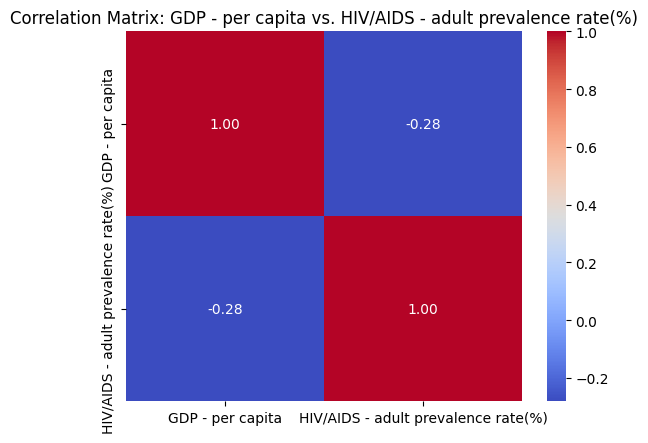

In [6]:
corr_df_sorted = df.sort_values(by='GDP', ascending=False)
corr_df = corr_df_sorted[['GDP - per capita', 'HIV/AIDS - adult prevalence rate(%)']].iloc[150:200]
corr_df.dropna(inplace=True)
correlation_matrix = corr_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: GDP - per capita vs. HIV/AIDS - adult prevalence rate(%)')
plt.show()

The matrix shows a weak negative correlation between GDP per capita and HIV/AIDS infections among adults. This means a mild tendency of countries with high GDP per capita to lower the number of infections, but this is not a strong dependency.

##### **Ranking of countries with the largest population (sorted in descending order), their labor force and unemployment rate**

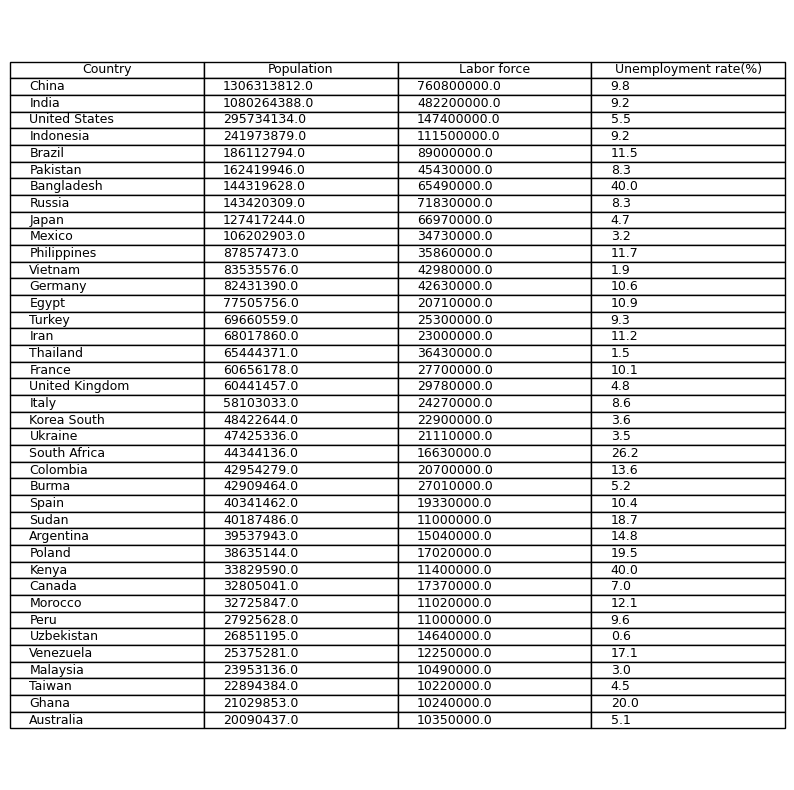

In [16]:
df_labor_force = df[df['Labor force'] > 10000000]
df_labor_force = df_labor_force[df_labor_force['Country'] != '#European Union']
df_labor_force = df_labor_force[pd.to_numeric(df_labor_force['Unemployment rate(%)'], errors='coerce').notna()]
df_labor_force = df_labor_force[['Country', 'Population', 'Labor force', 'Unemployment rate(%)']]
df_labor_force = df_labor_force.sort_values(by='Population', ascending=False)

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_axis_off()
ax.table(colLabels=['Country', 'Population', 'Labor force', 'Unemployment rate(%)'],
          cellText=df_labor_force.values,
          loc='center', cellLoc='left')

plt.show()

In this comparison we see that some countries stand out clearly with a high unemployment rate: South Africa, Venezuela, Ghana, Bangladesh and even Poland, which are mainly developing countries.